In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [29]:
df = pd.read_csv('./data.csv',index_col='Year')
df.head()

,homelessness,unemployment,house price
Year,,,
2007,1081,3278459.667,772
2008,1036,3281500.833,801
2009,1191,3191218.500,807
2010,1280,3198448.000,825
2011,1282,3232509.333,822


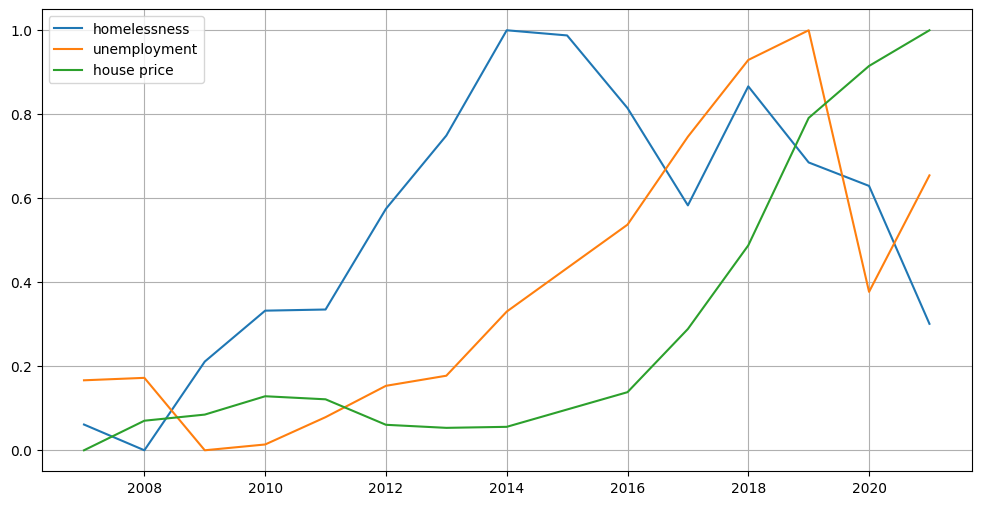

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
sdf_np = scaler.fit_transform(df)
sdf = pd.DataFrame(sdf_np, columns=df.columns, index=df.index)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(sdf)
plt.legend(sdf.columns)
plt.show()

In [86]:
nobs = int(5) # number of future steps to predict
# differenced train data
df_diff = df.diff()
df_diff.dropna(inplace=True)
print('Glimpse of differenced data:')
print(df_diff.head())

Glimpse of differenced data:
      homelessness  unemployment  house price
Year                                         
2008         -45.0      3041.166         29.0
2009         155.0    -90282.333          6.0
2010          89.0      7229.500         18.0
2011           2.0     34061.333         -3.0
2012         176.0     39064.500        -25.0


In [67]:
import statsmodels.tsa.api as smt

In [68]:
var_model = smt.VAR(df_diff)
res = var_model.select_order(maxlags=2)
print(res.summary())
results = var_model.fit(maxlags=2, ic='aic')
print(results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       40.97       41.09   6.240e+17       40.93
1       39.93       40.42   2.386e+17       39.75
2      37.55*      38.40*  3.361e+16*      37.23*
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Oct, 2022
Time:                     07:35:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    38.3971
Nobs:                     12.0000    HQIC:                   37.2344
Log likelihood:          -255.373    FPE:                3.36082e+16
AIC:                      37.5485    Det(Omega_mle):     8.46697e+15
--------------------------------------------------------------------
Results for equation homelessness
                     coeffi

/Users/hanbitlee/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [79]:
nobs=5
pred = results.forecast(results.endog, steps=nobs)
pred = pd.DataFrame(pred, columns = df.columns+ '_pred')
print(pred)

   homelessness_pred  unemployment_pred  house price_pred
0         137.061142      -17480.216879        -23.169866
1         -91.754530      221909.646769         59.783010
2         202.293018      -39297.515417         51.026585
3        -155.357730       31912.084009         94.687807
4          18.931384     -152301.144641         25.739457


In [85]:
pred = pd.DataFrame(pred, columns=df.columns+ '_pred')
def invert_transformation(df_diff, pred):
    forecast = pred.copy()
    columns = df.columns
    for col in columns:
        forecast[str(col)+'_pred'] = df[col].iloc[-1] +   forecast[str(col) +'_pred'].cumsum()
    return forecast

output = invert_transformation(df_diff, pred)
print(output.loc[:, ['homelessness_pred']])
output = pd.DataFrame(output['homelessness_pred'])
print(output)

   homelessness_pred
0        1394.061142
1        1302.306611
2        1504.599629
3        1349.241899
4        1368.173283
   homelessness_pred
0        1394.061142
1        1302.306611
2        1504.599629
3        1349.241899
4        1368.173283
